In [99]:
from scipy.io import arff
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
filename = '../data/data.arff'
filename_csv = '../data/adult.data'

First, we read the arff file:

In [18]:
with open(filename, 'r') as f:
    data, meta = arff.loadarff(f)

print(data[0])
print(meta)

(25., b'Private', 226802., b'11th', 7., b'Never-married', b'Machine-op-inspct', b'Own-child', b'Black', b'Male', 0., 0., 40., b'United-States', b'<=50K')
Dataset: adult
	age's type is numeric
	workclass's type is nominal, range is ('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked')
	fnlwgt's type is numeric
	education's type is nominal, range is ('Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool')
	education-num's type is numeric
	marital-status's type is nominal, range is ('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse')
	occupation's type is nominal, range is ('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farmin

Now, we can perform some basic statistics.
For example, what is the distribution of the class attribute?

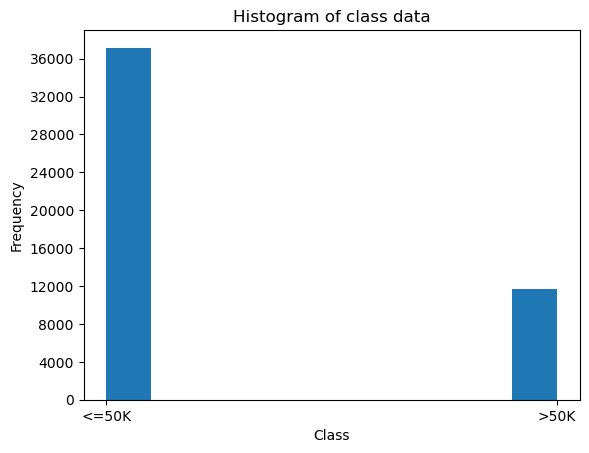

In [26]:
class_data = data['class']

# We can plot a histogram of the class data
plt.hist(class_data)
plt.title('Histogram of class data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

As we can see, it is about 25/75, which is not bad.
We can also see the distribution of different attributes, like the sex, the age and the race:

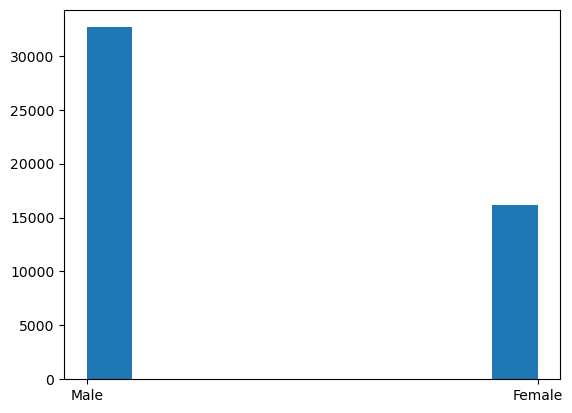

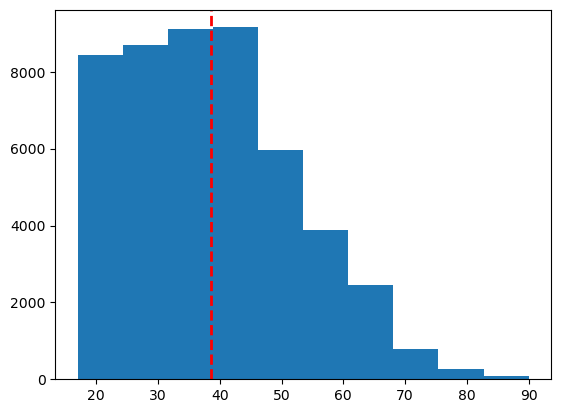

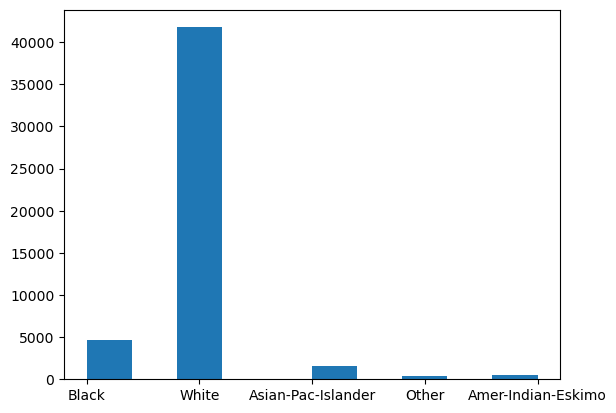

In [31]:
sex = data['sex']
age = data['age']
race = data['race']

# And plot it
plt.hist(sex)
plt.show()

plt.hist(age)
# we plot the average age
plt.axvline(np.mean(age), color='r', linestyle='dashed', linewidth=2)
plt.show()

plt.hist(race)
plt.show()

We can see how the dataset is mainly composed of white-males between 20 and 40 years old. Thus, we can see that the dataset is not balanced, and we will have to take this into account when we train our models. This will be an added challenge to the project.

For instance, an initial assessment that we can do is to see how the income is distributed:

Percentage of white people with salary > 50K:  0.2539868780230832
Percentage of black people with salary > 50K:  0.1208110992529349


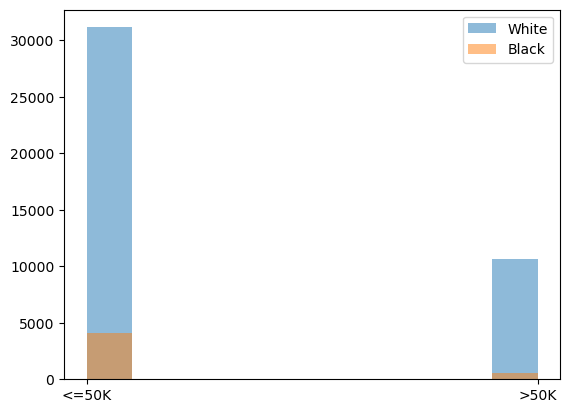

In [36]:
# Let's see how is the salary distribution in white people and black people
white = data[data['race'] == b'White']['class']
black = data[data['race'] == b'Black']['class']

# We can compute the percentage of people with salary > 50K
print('Percentage of white people with salary > 50K: ', np.sum(white == b'>50K') / len(white))
print('Percentage of black people with salary > 50K: ', np.sum(black == b'>50K') / len(black))

# Let's plot both histograms together
plt.hist(white, alpha=0.5, label='White')
plt.hist(black, alpha=0.5, label='Black')
plt.legend(loc='upper right')
plt.show()

This way, we see how there are significant differences between the distribution of the class attribute in each group. This will ultimately affect our models, and we will try to take measures to reduce the bias, assessing the impact of the measures in the results.

In [25]:
# Remove spaces from the file
with open(filename_csv, 'r') as f:
    lines = f.readlines()
    lines = [line.replace(' ', '') for line in lines]

with open(filename_csv, 'w') as f:
    f.writelines(lines)
    

In [36]:
# We read the csv file, ? are missing values
df = pd.read_csv(filename_csv, header=None, na_values='?',names=['age','workclass','fnlgwt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

# We can see the first 5 rows
print(df.head())

   age         workclass  fnlgwt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [37]:
# How many rows and columns are there?
print(df.shape)
# How many missing values are there?
print(df.isnull().sum())

(32561, 15)
age                  0
workclass         1836
fnlgwt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


# Preprocessing

We are going to perform some preprocessing to the dataset, in order to make it more suitable for our models. We will perform the following steps:

1. Inspection of the dataset

In [38]:
df.head()

,age,workclass,fnlgwt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df.describe()

,age,fnlgwt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
df.isnull().sum()

age                  0
workclass         1836
fnlgwt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

2. Data cleaning

We can see how workclass and occupation have missing values. We will have to deal with them. Firstly, let's see if they are missing in the same rows (which seems reasonable because the amount of missing values is almost the same): 

In [47]:
filter = df['occupation'].isnull() & df['workclass'].isnull()

df.loc[filter].count()

age               1836
workclass            0
fnlgwt            1836
education         1836
education-num     1836
marital-status    1836
occupation           0
relationship      1836
race              1836
sex               1836
capital-gain      1836
capital-loss      1836
hours-per-week    1836
native-country    1809
class             1836
dtype: int64

This means that all instances without workclass also have missing occupation. We will have to deal with this. We have to further inspect these columns, because maybe they are telling us the same information.

In [53]:
# 1. We get all possible pairs of values for the occupation and workclass
# 2. We group by occupation and workclass
# 3. We see if the mapping is unique
print(df.groupby(['occupation', 'workclass']).size().reset_index().rename(columns={0:'count'}))
print(df.groupby(['workclass','occupation']).size().reset_index().rename(columns={0:'count'}))

          occupation         workclass  count
0       Adm-clerical       Federal-gov    317
1       Adm-clerical         Local-gov    283
2       Adm-clerical           Private   2833
3       Adm-clerical      Self-emp-inc     31
4       Adm-clerical  Self-emp-not-inc     50
..               ...               ...    ...
76  Transport-moving           Private   1266
77  Transport-moving      Self-emp-inc     27
78  Transport-moving  Self-emp-not-inc    122
79  Transport-moving         State-gov     41
80  Transport-moving       Without-pay      1

[81 rows x 3 columns]
      workclass         occupation  count
0   Federal-gov       Adm-clerical    317
1   Federal-gov       Armed-Forces      9
2   Federal-gov       Craft-repair     64
3   Federal-gov    Exec-managerial    180
4   Federal-gov    Farming-fishing      8
..          ...                ...    ...
76  Without-pay    Farming-fishing      6
77  Without-pay  Handlers-cleaners      1
78  Without-pay  Machine-op-inspct      1
79  W

We can see that the mapping is not unique, so both attributes are informative. We will have to deal with the missing values somehow. For now, let's just drop this rows (only 5%). #TODO: try to impute the missing values

In [60]:
#drop the rows with workclass or occupation missing
df = df.dropna(subset=['occupation', 'workclass'])
df.isnull().sum()

age                 0
workclass           0
fnlgwt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
class               0
dtype: int64

We still have plenty of null values in the native-country column. For now, we will just drop this column, because we don't have enough information to fill the missing values. #TODO: try to fill the missing values

In [61]:
df = df.dropna(subset=['native-country'])
df.isnull().sum()

age               0
workclass         0
fnlgwt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Now, we can see that the dataset is clean, and we can start to preprocess it.

3. Are the columns 'education' and 'education-num' redundant?

In [62]:
print(df.groupby(['education', 'education-num']).size().reset_index().rename(columns={0:'count'}))

       education  education-num  count
0           10th              6    820
1           11th              7   1048
2           12th              8    377
3        1st-4th              2    151
4        5th-6th              3    288
5        7th-8th              4    557
6            9th              5    455
7     Assoc-acdm             12   1008
8      Assoc-voc             11   1307
9      Bachelors             13   5044
10     Doctorate             16    375
11       HS-grad              9   9840
12       Masters             14   1627
13     Preschool              1     45
14   Prof-school             15    542
15  Some-college             10   6678


Indeed, the column 'education-num' is a numerical representation of the column 'education'. As we can see, the numerical representation introduces a notion of order in the categories. We have seen that this can be problematic, but in this case, the order could be meaningful. For example, a person with a master degree is more likely to have a higher income than a person with a high school degree. 

Therefore, we will keep both columns, and we will try to see if the numerical representation is useful for our models, or if we should just use the categorical representation or a one-hot encoding.

4. Explorative analysis

We are going to start by plotting the distribution of the income for each category of the categorical attributes. We will start with the age:

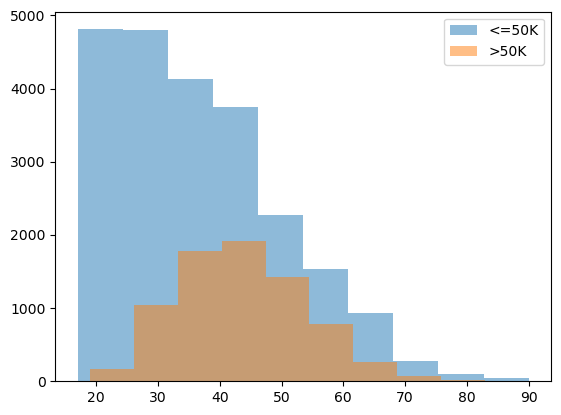

In [63]:
plt.hist(df[df['class'] == '<=50K']['age'], alpha=0.5, label='<=50K')
plt.hist(df[df['class'] == '>50K']['age'], alpha=0.5, label='>50K')
plt.legend(loc='upper right')
plt.show()

Observations:
- There are less people with income >50K, but this distribution follows a somewhat normal distribution centered in the 40s.
- The <=50K distribution is more skewed to the left, and it is more concentrated in the 20s and 30s.

Let's now see what happens with the education:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']


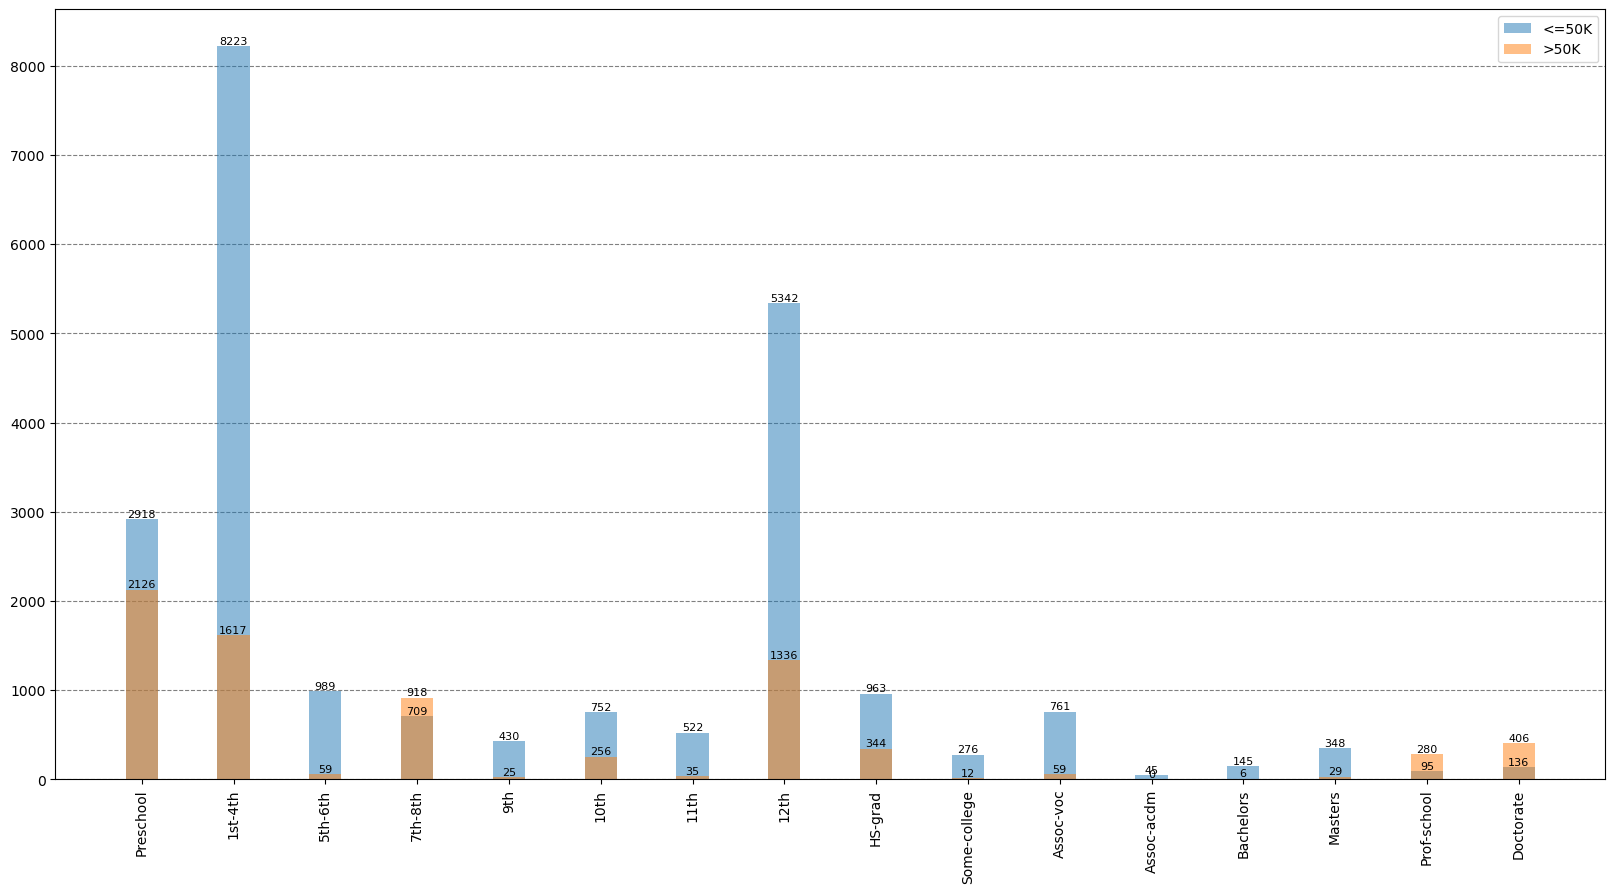

In [96]:
#plot the class against the education, for each education we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['education-num'].unique()
#sort the labels
labels.sort()
#get the correspondent education to each education-num
labels2 = [df[df['education-num'] == label]['education'].iloc[0] for label in labels]
print(labels)
print(labels2)
bin_edges = np.arange(len(labels)+1) - 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['education'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['education'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels2)), labels2, rotation='vertical')
#separate the bars
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()

What is happening with people from 7th-8th grade? xD

Anyways, let's see what happens with the marital-status:

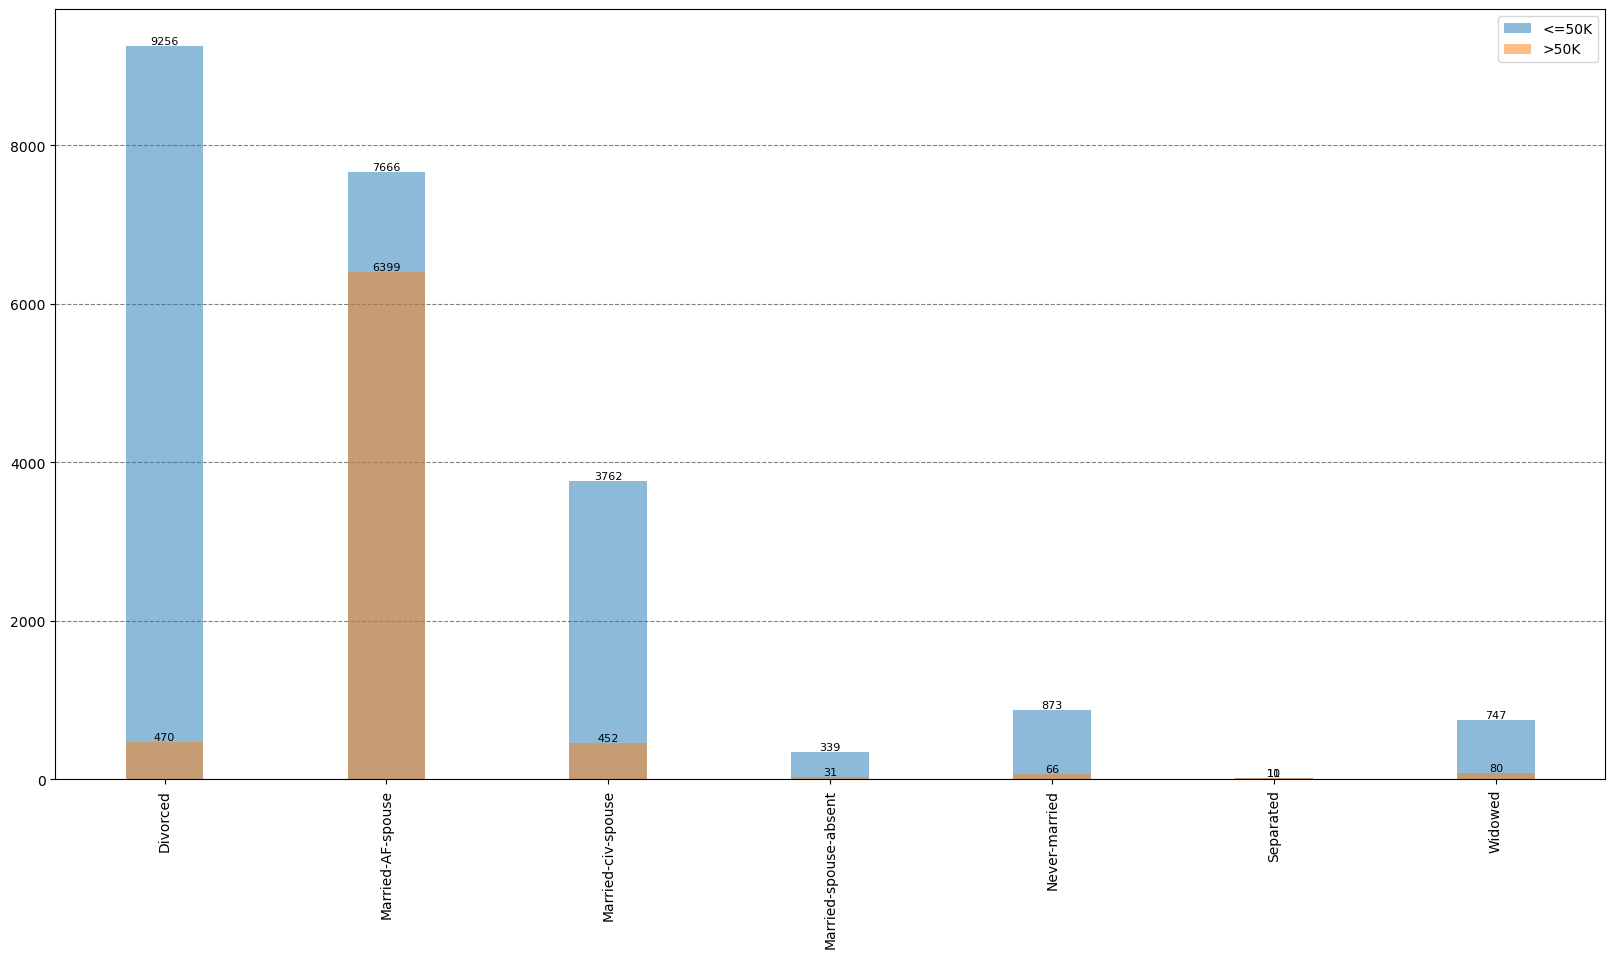

In [97]:
#plot the class against the marital-status, for each marital-status we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['marital-status'].unique()
#sort the labels
labels.sort()
bin_edges = np.arange(len(labels)+1) - 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['marital-status'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['marital-status'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels)), labels, rotation='vertical')
#separate the bars
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()


All classes are quite skewed towards <=50K, except for the Married-civ-spouse class. This is interesting, because it means that people who are married are more likely to have a higher income. This is probably because married people are more likely to have a stable job, and thus, a higher income.

Of course, the occupation is also important:

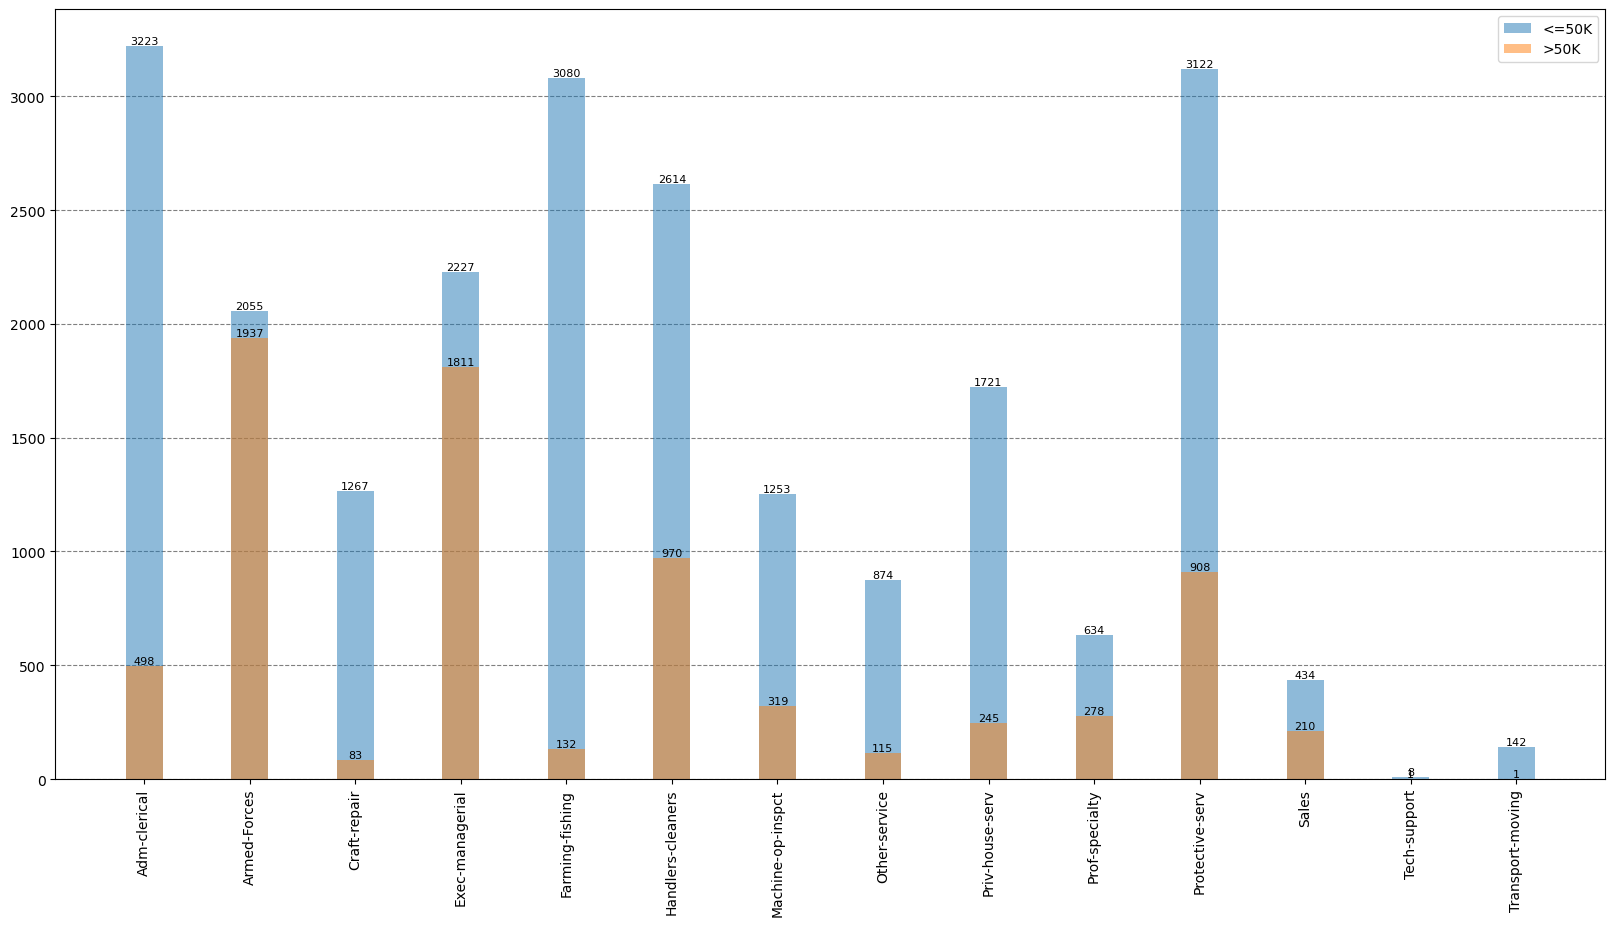

In [98]:
#plot the class against the occupation, for each occupation we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['occupation'].unique()
#sort the labels
labels.sort()
bin_edges = np.arange(len(labels)+1) - 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['occupation'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['occupation'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels)), labels, rotation='vertical')
#separate the bars 
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()

As we can see, in most jobs, most people have a <=50K income. However, there are some exceptions, like Exec-managerial and armed forces. This is interesting, because it means that some jobs are more likely to have a higher income.

Now, we can assess if the numerical variables that we have are related between them. For this, we are going to plot a correlation matrix:

/tmp/ipykernel_17822/546123972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(['education-num'], axis=1).corr()


<AxesSubplot:>

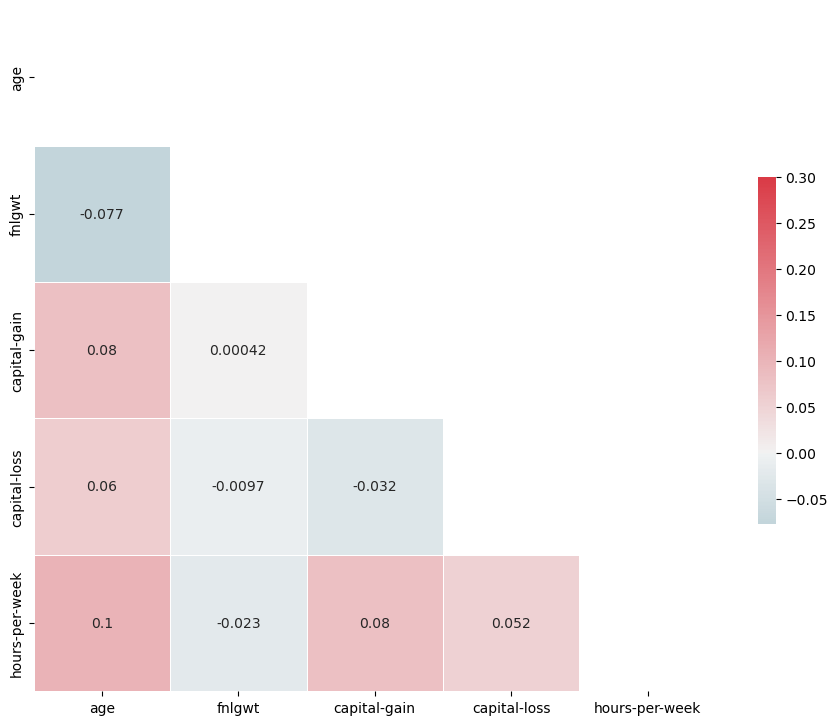

In [104]:
# Correlation matrix of the numerical features, except education-num
corr = df.drop(['education-num'], axis=1).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw also the values of the correlation
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

We observe that the maximum correlation is 0.08, which is very low. This means that numerical variables are not highly correlated, and we can keep them all, because they are all informative by themselves.

Let's now see how these numerical variables are distributed:

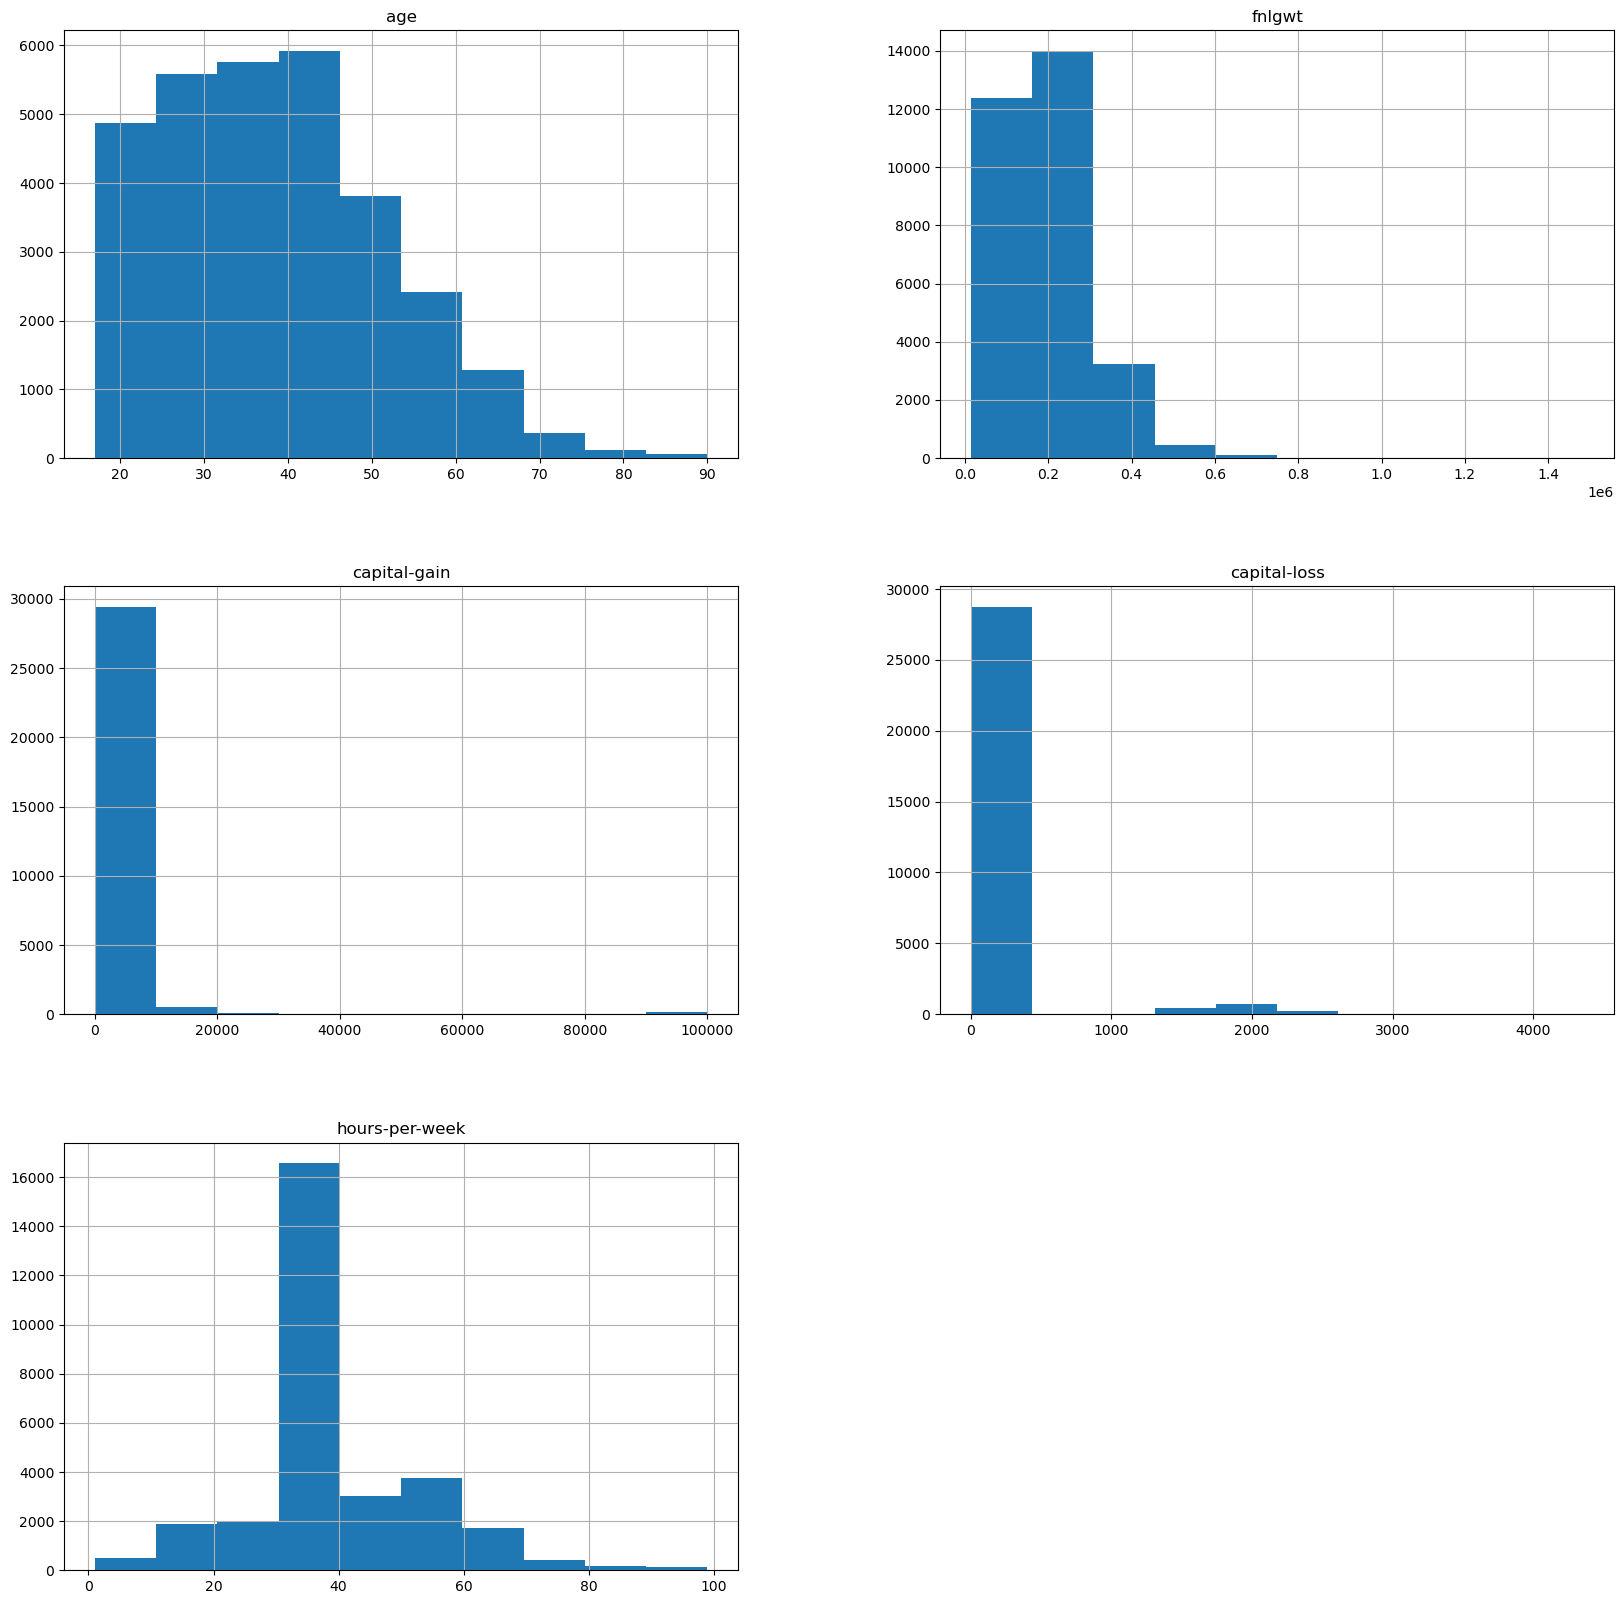

In [106]:
# Plot the distribution of the numerical features, except education-num
df.drop(['education-num'], axis=1).hist(figsize=(20,20))
plt.show()

Capital-gain and capital-loss are highly skewed, we have to take a deeper look at them.

       capital-gain  capital-loss
count  30162.000000  30162.000000
mean    1092.007858     88.372489
std     7406.346497    404.298370
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000


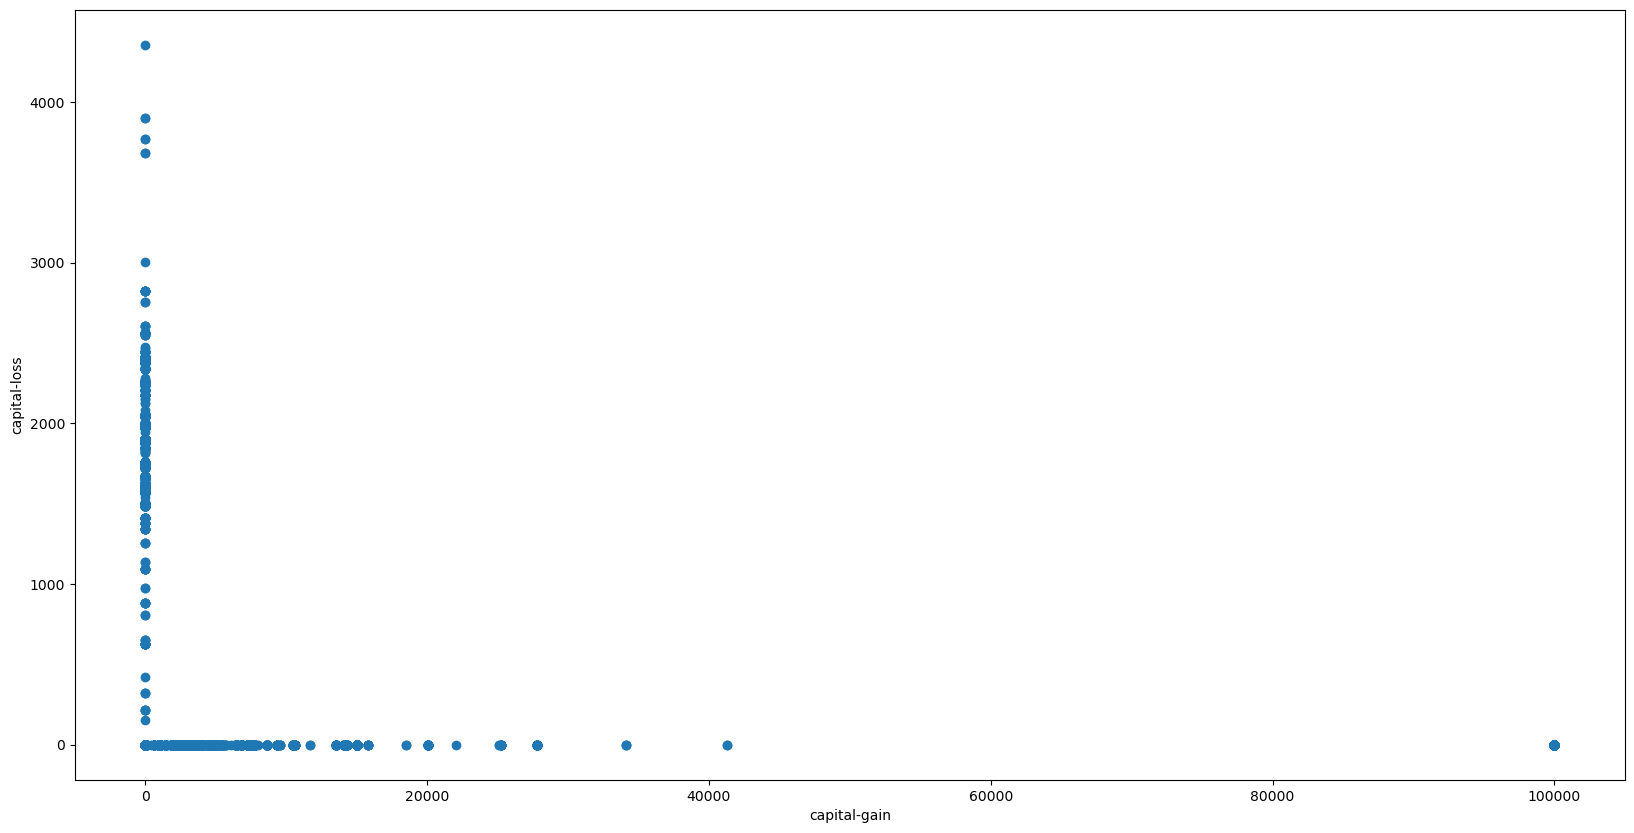

In [117]:
# Statistical description of capital-gain and capital-loss
print(df[['capital-gain', 'capital-loss']].describe())

# Let's plot the capital-gain and capital-loss one against the other
plt.figure(figsize=(20,10))
plt.scatter(df['capital-gain'], df['capital-loss'])
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()


This is very interesting: whenever capital-gain is greater than 0, then capital-loss is 0, and the opposite is also true.

One approach to this is to create a new variable that is the difference between capital-gain and capital-loss. This way, we will have a single variable that represents the net capital gain/loss. We will try this approach, and we will see if it improves the results. 

Pros:
- Simplification: Combining the two variables into one can simplify the data analysis process and make it easier to understand the relationship between the two variables.
- Fewer variables: Having fewer variables can be beneficial when working with large datasets or when trying to avoid overfitting in a model.

Cons:
- Loss of information: By combining the two variables, you lose information about the magnitude and direction of the individual variables. This can make it more difficult to understand the relationship between the variables.
- Skewed data: If the individual variables have different ranges or distributions, combining them into a single variable can skew the data and make it more difficult to analyze.

In [116]:
# We create the new feature capital-diff
df['capital-diff'] = df['capital-gain'] - df['capital-loss']

# If we were right, the absolute value of capital-diff should be equal to the sum of capital-gain and capital-loss
(df['capital-diff'].abs() == df['capital-gain'] + df['capital-loss']).all()

True

5. Outliers